Online Payment Use

Import Libraries

In [0]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Import Data

In [0]:

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

onlineUse_dataframe = pd.read_excel("OnlineUse.xlsx", sheet_name= 'OnlineUseData')
#onlineUse_dataframe = pd.get_dummies(onlineUse_dataframe, ['vendor'])

# Convert categorical variable to numeric values
onlineUse_dataframe["vendor"] = onlineUse_dataframe.vendor.astype("category").cat.codes

onlineUse_dataframe = onlineUse_dataframe.reindex(
    np.random.permutation(onlineUse_dataframe.index))

print(onlineUse_dataframe.head(10))

      ClinicID  OnlineAppointmentUse  malepct  ...  bcaaware  vendor  numpats
6248      6254                   0.2      0.5  ...       0.6       0     7012
4833      4839                   0.0      0.4  ...       0.3       0    13813
369        375                   0.3      0.5  ...       0.6       0    13430
3678      3684                   0.2      0.5  ...       0.5       0     3936
1715      1721                   0.1      0.6  ...       0.2       0    10525
6068      6074                   0.1      0.6  ...       0.5       0     8848
6544      6550                   0.1      0.5  ...       0.3       3     5725
6406      6412                   0.1      0.5  ...       0.4       0     2003
3500      3506                   0.3      0.4  ...       0.6       0    13885
1873      1879                   0.2      0.5  ...       0.5       0     6970

[10 rows x 22 columns]


In [0]:
# Remove -97 or -98 which indicates missing data

onlineUse_dataframe = onlineUse_dataframe.loc[(onlineUse_dataframe['OnlineAppointmentUse'] != -97) & 
                                          (onlineUse_dataframe['OnlineAppointmentUse'] != -98) &
                                          (onlineUse_dataframe['malepct'] != -97) &
                                          (onlineUse_dataframe['malepct'] != -98) &
                                          (onlineUse_dataframe['unemp'] != -97) &
                                          (onlineUse_dataframe['unemp'] != -98)&
                                          (onlineUse_dataframe['age16to24'] != -97) & 
                                          (onlineUse_dataframe['age16to24'] != -98) &
                                          (onlineUse_dataframe['age25to34'] != -97) &
                                          (onlineUse_dataframe['age25to34'] != -98) &
                                          (onlineUse_dataframe['age35to44'] != -97) &
                                          (onlineUse_dataframe['age35to44'] != -98) &
                                          (onlineUse_dataframe['age45to54'] != -97) &
                                          (onlineUse_dataframe['age45to54'] != -98) &
                                          (onlineUse_dataframe['age55to64'] != -97) & 
                                          (onlineUse_dataframe['age55to64'] != -98) &
                                          (onlineUse_dataframe['age65to74'] != -97) & 
                                          (onlineUse_dataframe['age65to74'] != -98) &
                                          (onlineUse_dataframe['age75to84'] != -97) & 
                                          (onlineUse_dataframe['age75to84'] != -98) & 
                                          (onlineUse_dataframe['age85plus'] != -97) & 
                                          (onlineUse_dataframe['age85plus'] != -98) &
                                          (onlineUse_dataframe['phoneeasy'] != -97) & 
                                          (onlineUse_dataframe['phoneeasy'] != -98) &
                                          (onlineUse_dataframe['onlineasy'] != -97) &
                                          (onlineUse_dataframe['onlineasy'] != -98) &
                                          (onlineUse_dataframe['race'] != -97) & 
                                          (onlineUse_dataframe['race'] != -98) &
                                          (onlineUse_dataframe['longstdhealth'] != -97) &
                                          (onlineUse_dataframe['longstdhealth'] != -98) &
                                          (onlineUse_dataframe['canmngownhealth'] != -97) &
                                          (onlineUse_dataframe['canmngownhealth'] != -98) &
                                          (onlineUse_dataframe['reducedability'] != -97) &
                                          (onlineUse_dataframe['reducedability'] != -98) &
                                          (onlineUse_dataframe['prefgpalways'] != -97) &
                                          (onlineUse_dataframe['prefgpalways'] != -98) &
                                          (onlineUse_dataframe['bcaaware'] != -97) &
                                          (onlineUse_dataframe['bcaaware'] != -98) & 
                                          (onlineUse_dataframe['numpats'] != -97) & 
                                          (onlineUse_dataframe['numpats'] != -98)
                                          ]
print(onlineUse_dataframe.head(10))

      ClinicID  OnlineAppointmentUse  malepct  ...  bcaaware  vendor  numpats
6248      6254                   0.2      0.5  ...       0.6       0     7012
4833      4839                   0.0      0.4  ...       0.3       0    13813
369        375                   0.3      0.5  ...       0.6       0    13430
3678      3684                   0.2      0.5  ...       0.5       0     3936
1715      1721                   0.1      0.6  ...       0.2       0    10525
6068      6074                   0.1      0.6  ...       0.5       0     8848
6544      6550                   0.1      0.5  ...       0.3       3     5725
3500      3506                   0.3      0.4  ...       0.6       0    13885
1873      1879                   0.2      0.5  ...       0.5       0     6970
1511      1517                   0.3      0.5  ...       0.6       3     4532

[10 rows x 22 columns]


In [0]:
onlineUse_dataframe.shape[0]

6360

Preprocess

In [0]:
def preprocess_features(onlineUse_dataframe):

  selected_features = onlineUse_dataframe[
    ["malepct",
     "unemp",
     "age16to24",
     "age25to34",
     "age35to44",
     "age45to54",
     "age55to64",
     "age65to74",
     "age75to84",
     "age85plus",
     "phoneeasy",
     "onlineasy",
     "race",
     "longstdhealth",
     "canmngownhealth",
     "reducedability",
     "prefgpalways",
     "bcaaware",
     "vendor",
     ]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(onlineUse_dataframe):

  output_targets = onlineUse_dataframe["OnlineAppointmentUse"]
  return output_targets

Baseline Calculation

In [29]:
onlineUse_dataframe["OnlineAppointmentUse"].mean(axis = 0)

0.13847485287955946

Train/Validation Split

In [0]:
# Choose the first 5088 examples for training.
training_examples = preprocess_features(onlineUse_dataframe.head(5088))
training_targets = preprocess_targets(onlineUse_dataframe.head(5088))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 1272 examples for validation.
validation_examples = preprocess_features(onlineUse_dataframe.tail(1272))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(onlineUse_dataframe.tail(1272))



# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor
count,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0,5088.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-4.3,-1.1,-1.8,-2.2,-2.4,-4.2,-3.5,-2.7,-2.3,-1.8,-3.4,-4.8,-3.0,-3.9,-5.4,-3.2,-2.5,-2.6,-0.8
25%,-0.7,-0.7,-0.6,-0.7,-0.7,-0.7,-0.6,-0.7,-0.7,-0.7,-0.7,-0.6,-0.5,-0.6,-0.6,-0.7,-0.7,-0.7,-0.8
50%,-0.0,-0.3,-0.1,-0.1,-0.1,-0.0,0.0,0.0,-0.0,-0.1,0.2,0.1,0.4,0.0,0.1,-0.0,-0.1,-0.0,-0.8
75%,0.6,0.5,0.5,0.6,0.6,0.6,0.6,0.7,0.7,0.6,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.7,1.1
max,5.1,13.2,11.0,6.4,4.7,4.1,3.6,3.9,3.8,6.6,1.5,1.9,1.0,5.7,2.0,4.2,2.6,2.9,2.4


Validation examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor
count,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0
mean,0.0,0.1,-0.0,0.0,-0.0,0.1,-0.0,-0.0,-0.0,-0.0,-0.1,-0.0,-0.1,-0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.1,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.1,-1.1,-1.8,-2.1,-2.3,-3.1,-3.5,-2.6,-2.3,-1.8,-3.2,-6.4,-3.0,-3.6,-6.0,-3.1,-2.4,-2.4,-0.8
25%,-0.6,-0.7,-0.6,-0.7,-0.7,-0.6,-0.6,-0.7,-0.7,-0.8,-0.7,-0.7,-0.7,-0.7,-0.6,-0.7,-0.7,-0.7,-0.8
50%,0.0,-0.2,-0.1,-0.2,-0.1,0.1,0.0,-0.0,-0.0,-0.2,0.1,0.1,0.4,0.0,0.1,0.0,-0.1,0.0,-0.8
75%,0.6,0.6,0.4,0.5,0.6,0.7,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.6,0.7,0.7,0.7,0.7,1.1
max,4.1,5.1,4.2,7.2,4.3,3.5,3.5,3.2,3.7,4.1,1.5,1.9,1.0,2.7,2.0,4.2,2.5,2.7,2.4


Training targets summary:


count   5088.0
mean       0.1
std        0.1
min        0.0
25%        0.1
50%        0.1
75%        0.2
max        0.6
Name: OnlineAppointmentUse, dtype: float64

Validation targets summary:


count   1272.0
mean       0.1
std        0.1
min        0.0
25%        0.1
50%        0.1
75%        0.2
max        0.6
Name: OnlineAppointmentUse, dtype: float64

In [0]:
training_examples.shape

(5088, 19)

Build Model

In [0]:
baseline_model = keras.Sequential([
    keras.layers.Dense(200, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(200, activation=tf.nn.relu,),
    #keras.layers.Dense(100, activation=tf.nn.relu,),
    keras.layers.Dense(1)

  ])

baseline_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mse'])
baseline_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               4000      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 44,401
Trainable params: 44,401
Non-trainable params: 0
_________________________________________________________________


Fit Model

In [0]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])



In [0]:
print(min(b_history.history['mse']))

0.0011694777


Plot Results

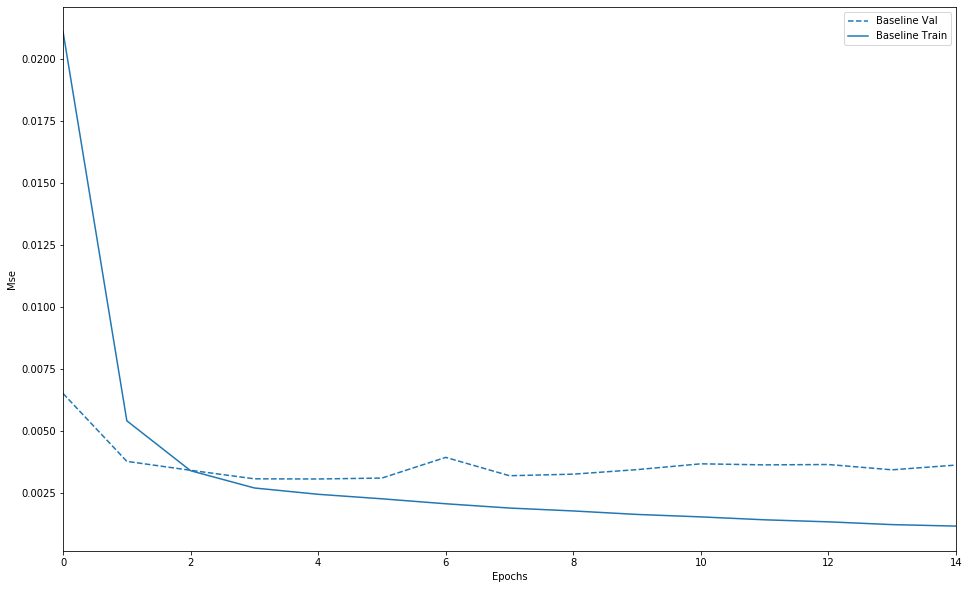

In [0]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  #plt.ylim([0,1])

plot_history([('baseline', b_history)])

Predictions

In [0]:
valpreds = baseline_model.predict_on_batch(validation_examples)
print(valpreds)

tf.Tensor(
[[-0.1661667 ]
 [ 0.21324268]
 [ 0.05951589]
 ...
 [-0.31350482]
 [-0.3008303 ]
 [-0.15199347]], shape=(1272, 1), dtype=float32)


In [0]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)

<BarContainer object of 200 artists>

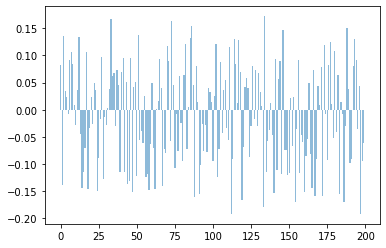

In [0]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

Regularized Models

In [0]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mse'])

l2_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l2_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mse'])


In [0]:
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

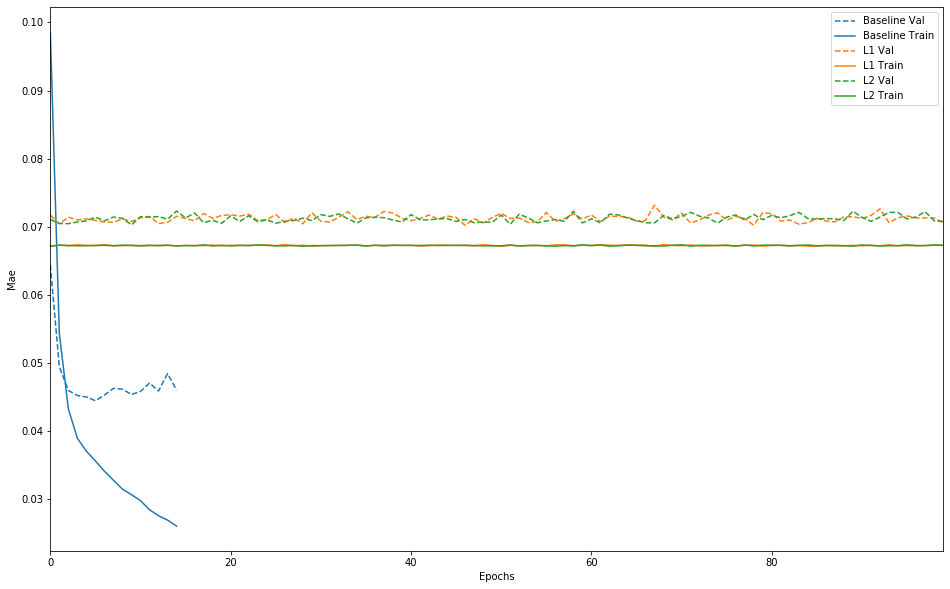

In [0]:
# Plot history Multiple
plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history)])